# Part 1 - Classificació de medicaments (Drug Classification drug200)

## Context

El dataset [drug200](datasets/drug200.csv) conté informació de pacients i el medicament que podria ser adequats per ells.

## Contingut

La característica objectiu és **Drug**. Els conjunts de característiques són:

- Age
- Sex
- BP (Nivells de Pressió Arterial (PA))
- Cholesterol
- Na_to_K (Ràtio de Sodi a Potassi)
- Drug

## Pregunta 1
Carrega el dataset i mostra les primeres 5 files.

In [11]:
import pandas as pd

df = pd.read_csv('datasets/drug200.csv')

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,DrugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,28.0,F,NORMAL,HIGH,7.798,drugX
4,61.0,F,LOW,HIGH,18.043,DrugY


## Pregunta 2

Indica quantes files i quantes columnes té el dataset.

In [12]:
files, columnes = df.shape
print(f"El dataset té {files} files i {columnes} columnes.")

El dataset té 200 files i 6 columnes.


## Pregunta 3

Identifica si hi ha valors nuls.

In [13]:
df.info()

print("\nComprovació de valors nuls:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          198 non-null    float64
 1   Sex          197 non-null    object 
 2   BP           199 non-null    object 
 3   Cholesterol  198 non-null    object 
 4   Na_to_K      198 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(2), object(4)
memory usage: 9.5+ KB

Comprovació de valors nuls:
Age            2
Sex            3
BP             1
Cholesterol    2
Na_to_K        2
Drug           1
dtype: int64


Què faries amb aquests valors (si hi ha)?

Variables numèriques: (Age, Na_to_K) utilitzem la mediana o la mitjana.
Variables categòriques: (Sex, BP, Cholesterol) es pot utilitzar la moda (la categoria més freqüent).
Variable objectiu (Drug): s’acostuma a eliminar la fila.

## Pregunta 4
Implementa l'anterior resposta. Comprova que després de fer-ho no falten valors.

In [14]:
# Calculem la mediana per Age i Na_to_K
age_mean = df['Age'].mean()
natok_mean = df['Na_to_K'].mean()

# Imputem valors nuls amb la mediana
df['Age'].fillna(age_mean, inplace=True)
df['Na_to_K'].fillna(natok_mean, inplace=True)

# Llista de columnes categòriques on vulgues omplir els valors nuls amb la moda
categorical_cols = ['Sex', 'BP', 'Cholesterol']

for col in categorical_cols:
    # Calculem la moda d'aquesta columna (ignorant valors nuls)
    mode_val = df[col].mode(dropna=True)
    df[col].fillna(mode_val.iloc[0], inplace=True)
    
# Eliminar files on no sabem el valor del target
df = df.dropna(subset=['Drug'])

print("\nDesprés de tractar valors nuls:\n")
print(df.info())
print(df.isnull().sum())


Després de tractar valors nuls:

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          199 non-null    float64
 1   Sex          199 non-null    object 
 2   BP           199 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      199 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(2), object(4)
memory usage: 10.9+ KB
None
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


/tmp/ipykernel_72872/2204071132.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace=True)
/tmp/ipykernel_72872/2204071132.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Pregunta 5
Acaba de preparar el dataset per poder-li'l passar a un model de machine learning.

In [15]:
cols_categoriques = ['Sex', 'BP', 'Cholesterol']

df = pd.get_dummies(df, columns=cols_categoriques, drop_first=True)

from sklearn.preprocessing import LabelEncoder

le_drug = LabelEncoder()
df["Drug"] = le_drug.fit_transform(df["Drug"])
print(df.head())

# Obtenim la relació de quin Drug és cada número
drug_mapping = dict(zip(le_drug.classes_, le_drug.transform(le_drug.classes_)))
print("\nRelació de Drug a número:", drug_mapping)

    Age  Na_to_K  Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0  23.0   25.355     0  False   False      False               False
1  47.0   13.093     3   True    True      False               False
2  47.0   10.114     3   True    True      False               False
3  28.0    7.798     4  False   False       True               False
4  61.0   18.043     0  False    True      False               False

Relació de Drug a número: {'DrugY': np.int64(0), 'drugA': np.int64(1), 'drugB': np.int64(2), 'drugC': np.int64(3), 'drugX': np.int64(4)}


## Pregunta 6
Fes un gràfic per mostrar la relació entre les variables l'edat i la ràtio de Sodi a Potassi per tipus de medicaments.
Comenta el resultat obtés.


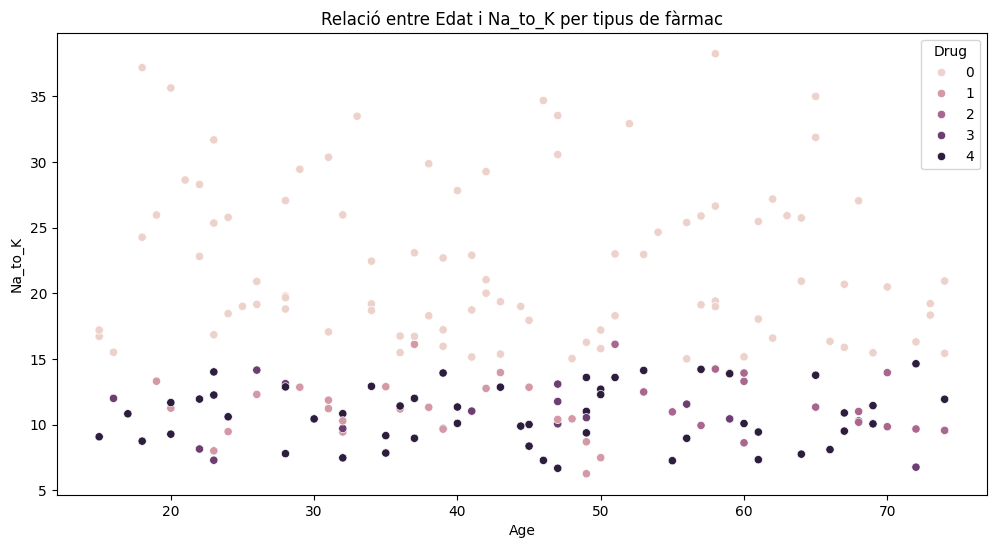

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 7. Gràfic: Relació Age vs Na_to_K amb colors per Drug
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.title("Relació entre Edat i Na_to_K per tipus de fàrmac")
plt.show()

Pareix que quan la ràtio de Sodi a Potassi és alta (>15), el medicament utilitzat és el  

## Pregunta 7
Fes algun altre gràfic que ajude a explicar l'anterior conclussió.

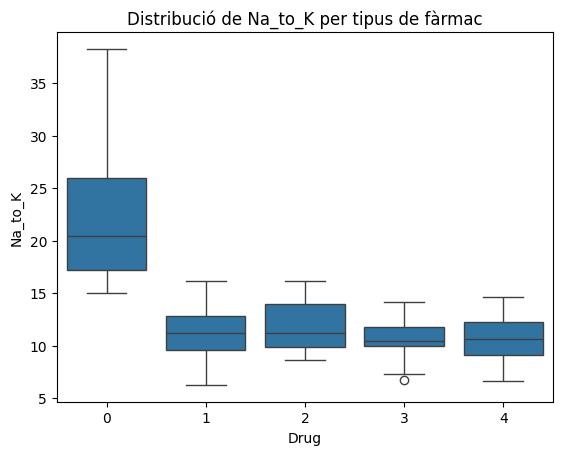

In [17]:

sns.boxplot(data=df, x='Drug', y='Na_to_K')
plt.title("Distribució de Na_to_K per tipus de fàrmac")
plt.show()

## Pregunta 8
Volem fer una aplicació per a ajudar els metges a receptart un o altre fàrmac. Prova els models:

- LogisticRegression
- KNeighborsClassifier
- SupportVectorClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier

Seleccionar el millor i raona la resposta.

In [18]:
df.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23.0,25.355,0,False,False,False,False
1,47.0,13.093,3,True,True,False,False
2,47.0,10.114,3,True,True,False,False
3,28.0,7.798,4,False,False,True,False
4,61.0,18.043,0,False,True,False,False


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Drug'])
y = df['Drug']

# Divisió en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {best_model.__class__.__name__} with accuracy {best_accuracy:.2f}")

/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.97
K-Nearest Neighbors Accuracy: 0.47
Support Vector Classifier Accuracy: 0.60
Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 1.00

Best Model: GradientBoostingClassifier with accuracy 1.00


## Pregunta 9
Quins son els paràmetres que més influixen en la predicció del millor model de l'apartat anterior? Quanitifica-ho.

In [20]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print(feature_importance)

              feature  importance
1             Na_to_K    0.616751
4           BP_NORMAL    0.168893
3              BP_LOW    0.114214
5  Cholesterol_NORMAL    0.066385
0                 Age    0.033755
2               Sex_M    0.000002


## Pregunta 10
Ens ha arribat una pacient de 39 anys, amb la pressió arterial alta, el colesterol normal i la ràtio Sodi a Potassi de 14. Quin fàrmac li administrarem?

In [21]:
# Dades del pacient (han de coincidir amb les columnes d'entrenament)
new_patient = pd.DataFrame({
    'Age': [39],                 # Edat
    'Na_to_K': [14],             # Ràtio Sodi a Potassi
    'Sex_M': [False],            # Sexe femení (False = Femení, True = Masculí)
    'BP_LOW': [False],           # BP baixa
    'BP_NORMAL': [False],        # BP normal
    'Cholesterol_NORMAL': [True] # Colesterol normal
})

# Fer la predicció directament amb el millor model
predicted_drug = best_model.predict(new_patient)

# Mapejar el resultat del codi del fàrmac al seu nom
drug_mapping = {0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'DrugY', 4: 'drugX'}
predicted_drug_name = drug_mapping[predicted_drug[0]]

print(f"El fàrmac recomanat per al pacient és: {predicted_drug_name}")

El fàrmac recomanat per al pacient és: drugB


# Part 2 - Deep Learning (imdb_top_1000)

## Context
- Entrenament d'un model de deep learning en un [dataset de pel·lícules i programes de televisió](datasets/imdb_top_1000.csv).
- Estudiar el rendiment del model amb diferents tècniques de regularització.
- Interpretar els resultats mitjançant gràfics.

### Columnes:
- **Poster_Link** - Enllaç del pòster que utilitza IMDB
- **Series_Title** - Nom de la pel·lícula
- **Released_Year** - Any en què es va estrenar la pel·lícula
- **Certificate** - Certificat obtingut per la pel·lícula
- **Runtime** - Durada total de la pel·lícula
- **Genre** - Gènere de la pel·lícula
- **IMDB_Rating** - Puntuació de la pel·lícula al lloc d'IMDB
- **Overview** - Mini història/resum
- **Meta_score** - Puntuació obtinguda per la pel·lícula recopil·lant l'opinió d'almenys quatre crítics especialitzats
- **Director** - Nom del director
- **Star1, Star2, Star3, Star4** - Nom de les estrelles
- **No_of_votes** - Nombre total de vots
- **Gross** - Diners guanyats per la pel·lícula

Considerarem que el nostre target és IMDB_Rating.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/imdb_top_1000.csv')  
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


## Pregunta 11
Donat el següent preprocessat de dades, explica (amb comentaris) perquè hem fet cadascuna de les transformacions:

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# 1. Convertir 'Gross' a float i omplir valors nuls amb la mitjana
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)  # Eliminem comes i convertim a float
gross_mean = df['Gross'].mean()  # Calculem la mitjana
df['Gross'].fillna(gross_mean, inplace=True)  # Substituïm valors nuls per la mitjana

# 2. Omplim els valors nuls de 'Meta_score' amb la mitjana
meta_score_mean = df['Meta_score'].mean()  # Calculem la mitjana
df['Meta_score'].fillna(meta_score_mean, inplace=True)  # Substituïm valors nuls per la mitjana

# 3. Seleccionar característiques rellevants
# Incloem 'Released_Year', 'Genre', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', i 'Gross'
X = df[['Released_Year', 'Genre', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']]
y = df['IMDB_Rating']  # Variable objectiu (puntuació IMDb)

# 4. Convertir dades categòriques en variables numèriques
# a) Gestionar gèneres (columna 'Genre')
X['Genre'] = X['Genre'].fillna('')  # Omplim valors nuls amb cadenes buides
genre_split = X['Genre'].str.get_dummies(sep=',')  # Creem columnes binàries per a cada gènere

# b) Codifiquem director i actors
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Afegeixo sparse_output=False
categorical_cols = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
categorical_encoded = encoder.fit_transform(X[categorical_cols])  # Convertim en format dens directament

# 5. Eliminem les columnes categòriques originals i combinem amb les codificades
X = X.drop(['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'], axis=1)
X = np.hstack([X.values, genre_split.values, categorical_encoded])

# 6. Normalitzar característiques numèriques
# Normalitzem 'Released_Year', 'Meta_score', i 'Gross'
scaler = MinMaxScaler()
numeric_cols = [0, 1, 2]  # Índexs de 'Released_Year', 'Meta_score', i 'Gross' després de l'hstack
X[:, numeric_cols] = scaler.fit_transform(X[:, numeric_cols])

# 7. Dividir les dades en conjunts d'entrenament i validació
# Dividim en un 80% entrenament i 20% validació
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Verificar valors nuls
print(f"Valors nuls a X_train després de la neteja: {np.isnan(X_train).sum()}")
print(f"Valors nuls a X_val després de la neteja: {np.isnan(X_val).sum()}")

# Mostrem les formes dels conjunts per verificar
print(f"Forma del conjunt d'entrenament X_train: {X_train.shape}")
print(f"Forma del conjunt de validació X_val: {X_val.shape}")


Valors nuls a X_train després de la neteja: 0
Valors nuls a X_val després de la neteja: 0
Forma del conjunt d'entrenament X_train: (800, 3916)
Forma del conjunt de validació X_val: (200, 3916)


/tmp/ipykernel_72872/479297502.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(gross_mean, inplace=True)  # Substituïm valors nuls per la mitjana
/tmp/ipykernel_72872/479297502.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [25]:
print("Valors nuls a X_train:", np.isnan(X_train).sum())
print("Valors infinits a X_train:", np.isinf(X_train).sum())
print("Valors nuls a y_train:", np.isnan(y_train).sum())
print("Valors infinits a y_train:", np.isinf(y_train).sum())

print("Valors nuls a X_val:", np.isnan(X_val).sum())
print("Valors infinits a X_val:", np.isinf(X_val).sum())
print("Valors nuls a y_val:", np.isnan(y_val).sum())
print("Valors infinits a y_val:", np.isinf(y_val).sum())

print(df.info())

Valors nuls a X_train: 0
Valors infinits a X_train: 0
Valors nuls a y_train: 0
Valors infinits a y_train: 0
Valors nuls a X_val: 0
Valors infinits a X_val: 0
Valors nuls a y_val: 0
Valors infinits a y_val: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 n

## Pregunta 12
Crea, entrena i analitza el resultat d'un model bàsic en Keras. Ha d'incloure:
- Dissenyar una xarxa neuronal amb capes denses.
- Compilar el model utilitzant una funció de pèrdua adequada i un optimitzador.
- Entrenar el model


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Crear el model
model = Sequential([
    Dense(64, activation='relu', input_dim=3916),  # Primera capa densa amb 64 neurones
    Dense(32, activation='relu'),  # Segona capa densa amb 32 neurones
    Dense(1)  # Capa de sortida (predicció de puntuació IMDb)
])

# 2. Compilar el model
model.compile(optimizer='adam',  # Optimitzador Adam
              loss='mse',        # Funció de pèrdua: Error quadràtic mitjà (MSE)
              metrics=['mae'])   # Métrica: Error absolut mitjà (MAE)

# 3. Entrenar el model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),  # Conjunt de validació
                    epochs=50,                      # Nombre d'èpoques
                    batch_size=32,                  # Tamany del lot
                    verbose=1)                      # Mostrar la barra de progrés

Epoch 1/50


/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 60.9551 - mae: 7.7990 - val_loss: 48.3370 - val_mae: 6.9474
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.3630 - mae: 6.3124 - val_loss: 16.4544 - val_mae: 4.0179
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8020 - mae: 2.5051 - val_loss: 1.0708 - val_mae: 0.8234
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3310 - mae: 0.9867 - val_loss: 1.6842 - val_mae: 1.0663
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4236 - mae: 0.5059 - val_loss: 1.1574 - val_mae: 0.8407
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1791 - mae: 0.3297 - val_loss: 1.2238 - val_mae: 0.8838
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0897 - mae: 0.2244 - val_loss: 1.1654 - val_mae: 0.8613
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0352 - mae: 0.1363 - val_loss: 1.1710 - val_mae: 0.8694
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mae: 0.0972 

## Pregunta 13
Mostra les corbes d'aprenentatge.
Aprecies underfitting o overfitting a partir de les corbes? Indica en quines zones i justifica la resposta.


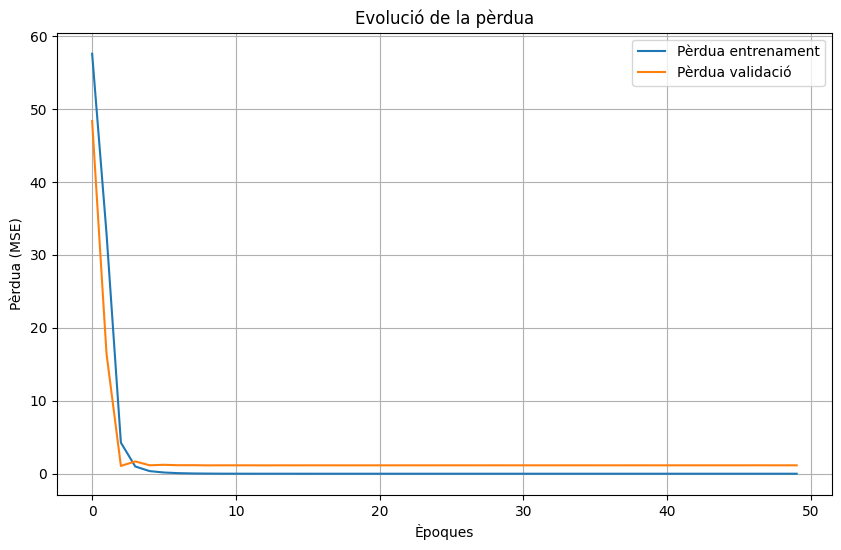

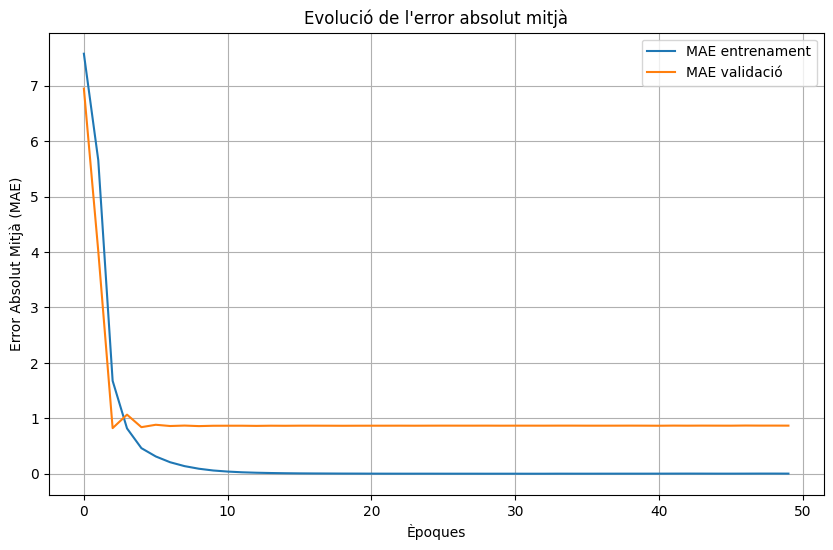

In [27]:
# Gràfic de la funció de pèrdua
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua (MSE)')
plt.title('Evolució de la pèrdua')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de la mètrica
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE entrenament')
plt.plot(history.history['val_mae'], label='MAE validació')
plt.xlabel('Èpoques')
plt.ylabel('Error Absolut Mitjà (MAE)')
plt.title('Evolució de l\'error absolut mitjà')
plt.legend()
plt.grid(True)
plt.show()

A partir de la 10a època, el model comença a ajustar-se excessivament a les dades d'entrenament, ja que l'error d'entrenament continua baixant mentre l'error de validació es manté constant.

## Pregunta 14

Implementa la tècnica de parada anticipada. Quin efecte té sobre el model?

Epoch 1/200


/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 61.8765 - mae: 7.8598 - val_loss: 53.0474 - val_mae: 7.2786
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.5210 - mae: 6.8747 - val_loss: 29.4562 - val_mae: 5.4117
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.6649 - mae: 4.3124 - val_loss: 4.0588 - val_mae: 1.8144
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2451 - mae: 0.8818 - val_loss: 1.1973 - val_mae: 0.8444
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6252 - mae: 0.6463 - val_loss: 1.6966 - val_mae: 1.0495
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2937 - mae: 0.4115 - val_loss: 1.3055 - val_mae: 0.8979
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1623 - mae: 0.3020 - val_loss: 1.3242 - val_mae: 0.9207
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0975 - mae: 0.2247 - val_loss: 1.2423 - val_mae: 0.8902
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0483 - ma

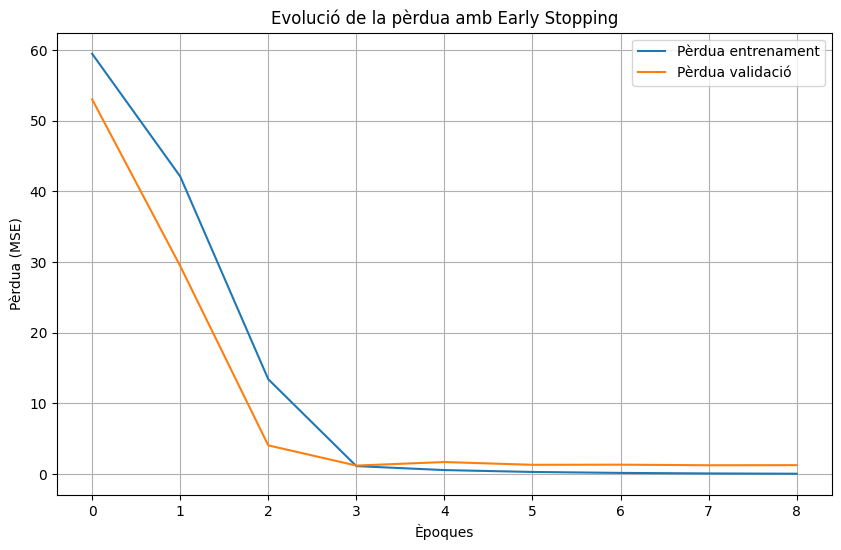

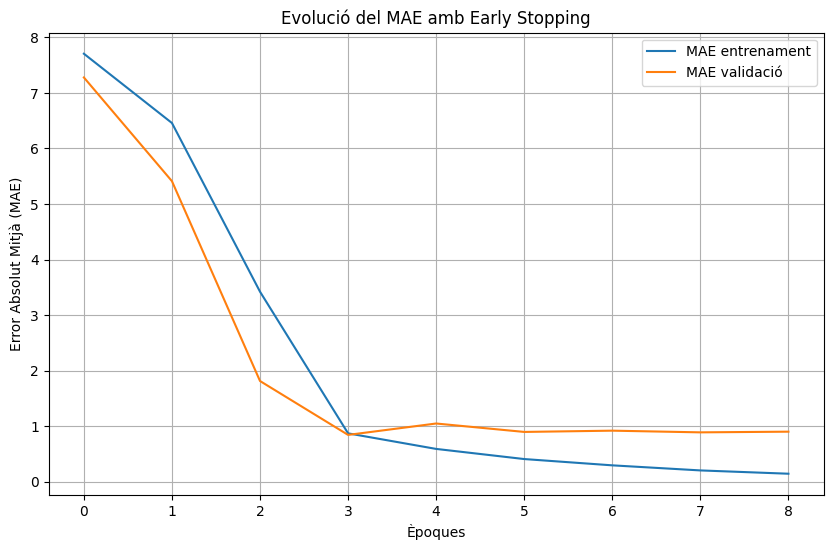

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Crear el model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa densa amb 64 neurones
    Dense(32, activation='relu'),  # Segona capa densa amb 32 neurones
    Dense(1)  # Capa de sortida (predicció de puntuació IMDb)
])

# Compilar el model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitoritza la pèrdua de validació
                               patience=5,         # Nombre d'èpoques sense millora abans de parar
                               restore_best_weights=True)  # Restaurar els pesos del millor model

# Entrenar el model amb Early Stopping
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=200,  # Nombre màxim d'èpoques
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stopping])  # Afegim el callback Early Stopping

# Gràfic de la funció de pèrdua
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua (MSE)')
plt.title('Evolució de la pèrdua amb Early Stopping')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de la mètrica
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE entrenament')
plt.plot(history.history['val_mae'], label='MAE validació')
plt.xlabel('Èpoques')
plt.ylabel('Error Absolut Mitjà (MAE)')
plt.title('Evolució del MAE amb Early Stopping')
plt.legend()
plt.grid(True)
plt.show()


1. Reducció de overfitting:

    Early Stopping deté l'entrenament quan la pèrdua de validació deixa de millorar. Això evita que el model memoritzi les dades d'entrenament i ajuda a generalitzar millor.
    La pèrdua de validació no s'incrementarà a les últimes èpoques, com passava abans.

2. Més eficiència en l'entrenament:

    L'entrenament s'atura automàticament quan és suficient, estalviant temps i recursos.

3. Gràfics esperats:

    La pèrdua de validació (val_loss) no s'allunyarà massa de la pèrdua d'entrenament (loss).
    El nombre total d’èpoques entrenades serà menor que el nombre màxim especificat (200 en aquest cas).

## Pregunta 15
Implementa i analitza l'efecte de Batch Normalization. Lleva la parada anticipada de l'apartat anterior.

Epoch 1/50


/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 63.7774 - mae: 7.9184 - val_loss: 62.0294 - val_mae: 7.8717
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 60.2285 - mae: 7.7260 - val_loss: 59.6706 - val_mae: 7.7203
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56.5242 - mae: 7.4968 - val_loss: 56.2946 - val_mae: 7.4984
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.0061 - mae: 7.1917 - val_loss: 51.6729 - val_mae: 7.1834
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 46.3930 - mae: 6.7866 - val_loss: 45.3800 - val_mae: 6.7311
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.4231 - mae: 6.3319 - val_loss: 37.9032 - val_mae: 6.1502
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.8944 - mae: 5.7901 - val_loss: 31.6763 - val_mae: 5.6206
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.4570 - mae: 5.2003 - val_loss: 24.7592 - val_mae: 4.9670
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.101

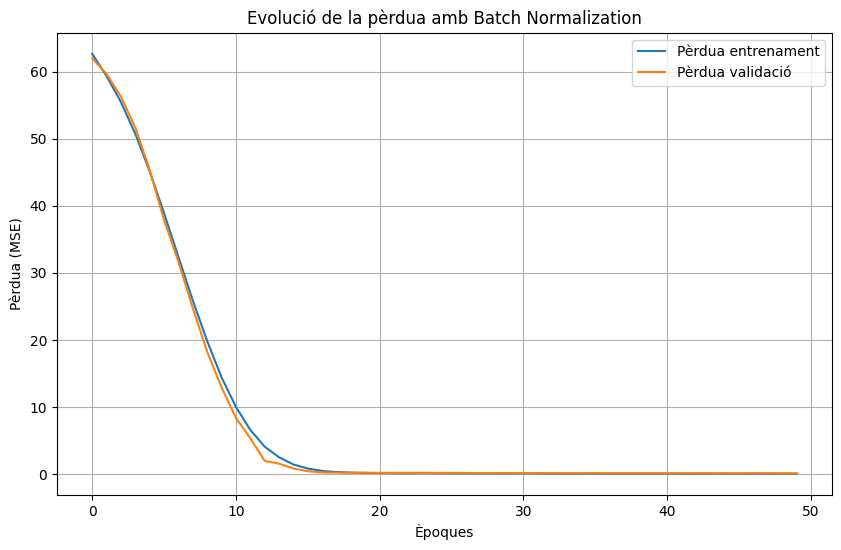

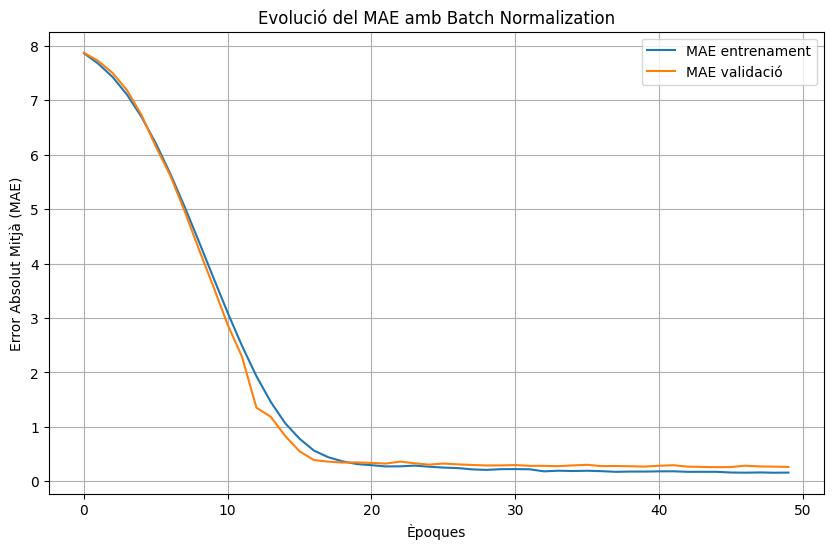

In [29]:
from tensorflow.keras.layers import BatchNormalization

# Crear el model amb Batch Normalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Afegir Batch Normalization després de la capa
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Capa de sortida
])

# Compilar el model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, 
                    batch_size=32,
                    verbose=1)

# Gràfic de la funció de pèrdua
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua (MSE)')
plt.title('Evolució de la pèrdua amb Batch Normalization')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de la mètrica
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE entrenament')
plt.plot(history.history['val_mae'], label='MAE validació')
plt.xlabel('Èpoques')
plt.ylabel('Error Absolut Mitjà (MAE)')
plt.title('Evolució del MAE amb Batch Normalization')
plt.legend()
plt.grid(True)
plt.show()


Millora de l'estabilitat de l'entrenament:

Batch Normalization manté l’escala de les sortides dins d’un rang més estable, reduint el risc de gradients explosius o de vanishing gradients.
Entrenament més ràpid:

En la majoria dels casos, Batch Normalization permet al model assolir un rendiment òptim amb menys èpoques.
Millora de la generalització:

Aquesta tècnica pot reduir overfitting, ja que afegeix una mica de soroll estocàstic durant l'entrenament (normalitza les sortides de cada lot).
Resultats observables als gràfics:

La pèrdua d’entrenament (loss) i la pèrdua de validació (val_loss) haurien de ser més similars, indicant una millor generalització.
Els valors de mae per entrenament i validació també haurien d'estar més pròxims.

## Pregunta 16
Implementa i analitza l'efecte de Dropout. Lleva la parada anticipada i la normalització per lots.

Epoch 1/50


/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 55.4318 - mae: 7.3728 - val_loss: 1.4124 - val_mae: 0.9502
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6188 - mae: 2.3184 - val_loss: 3.0467 - val_mae: 1.6409
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7844 - mae: 1.9382 - val_loss: 2.2670 - val_mae: 1.3854
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1913 - mae: 1.8007 - val_loss: 2.9128 - val_mae: 1.6016
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2451 - mae: 1.8340 - val_loss: 2.4200 - val_mae: 1.4344
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5653 - mae: 1.7363 - val_loss: 2.6956 - val_mae: 1.5405
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8696 - mae: 1.5935 - val_loss: 3.3306 - val_mae: 1.7341
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8643 - mae: 1.5812 - val_loss: 3.4839 - val_mae: 1.7770
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9476 - mae: 1.5852 - 

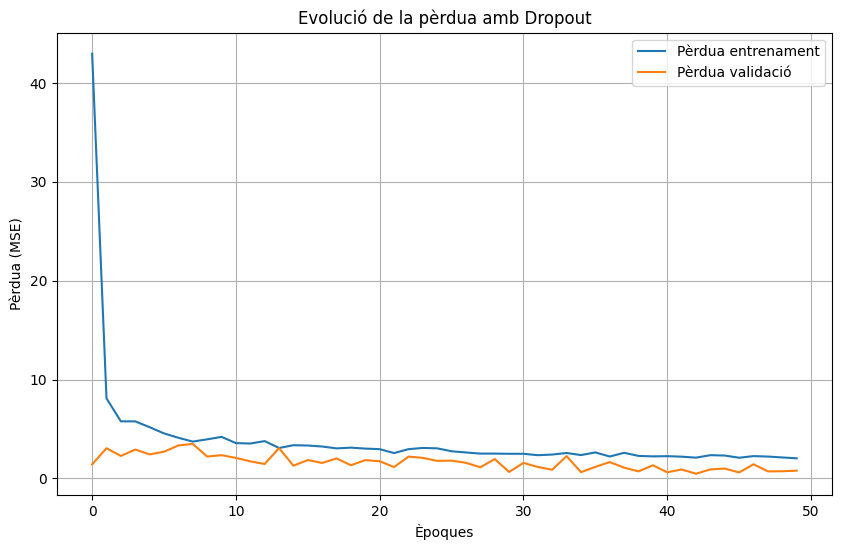

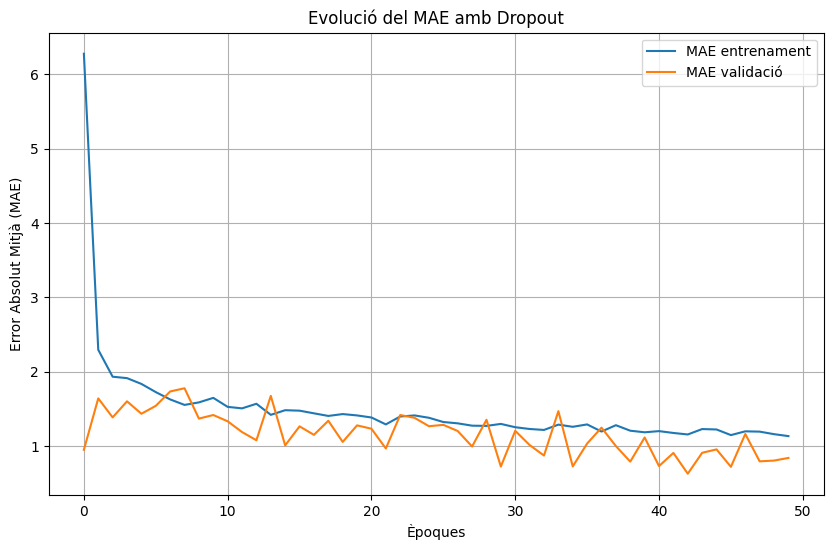

In [30]:
from tensorflow.keras.layers import Dropout

# Crear el model amb Dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Afegim Dropout amb un 30% de neurones desactivades
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Capa de sortida
])

# Compilar el model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, 
                    batch_size=32,
                    verbose=1)

# Gràfic de la funció de pèrdua
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua (MSE)')
plt.title('Evolució de la pèrdua amb Dropout')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de la mètrica
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE entrenament')
plt.plot(history.history['val_mae'], label='MAE validació')
plt.xlabel('Èpoques')
plt.ylabel('Error Absolut Mitjà (MAE)')
plt.title('Evolució del MAE amb Dropout')
plt.legend()
plt.grid(True)
plt.show()


### **Efectes esperats de Dropout**

1. **Reducció del *overfitting*:**
   - Dropout força el model a no confiar en cap conjunt de neurones en concret. Això pot fer que les corbes de pèrdua d’entrenament i validació estiguin més alineades.

2. **Entrenament més robust:**
   - Dropout introdueix variabilitat durant l'entrenament, la qual cosa fa que el model sigui més robust a les dades de validació i a dades desconegudes.

3. **Possible alentiment en l'entrenament:**
   - La pèrdua d’entrenament (`loss`) pot ser més alta inicialment a causa de les neurones desactivades. No obstant això, el rendiment de validació (`val_loss`) millorarà.

4. **Gràfics esperats:**
   - Les corbes de pèrdua i d'error haurien de tenir menys diferència entre entrenament i validació.
   - És possible que el descens de les corbes sigui més gradual.

## Pregunta 17
Junta en una implementació final els mètodes de Dropout, Batch Normalization i Early Stopping.
Fes un gràfic amb les corbes i comenta-les.

Epoch 1/200


/home/ferran/Documents/IES 24-25/PIA/pia_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 66.2875 - mae: 7.8882 - val_loss: 58.1579 - val_mae: 7.6219
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 60.9636 - mae: 7.6247 - val_loss: 53.3500 - val_mae: 7.2998
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 59.1301 - mae: 7.5243 - val_loss: 48.9011 - val_mae: 6.9884
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55.3453 - mae: 7.2687 - val_loss: 44.5676 - val_mae: 6.6711
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 50.0409 - mae: 6.9187 - val_loss: 41.0237 - val_mae: 6.3999
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 47.4026 - mae: 6.7273 - val_loss: 37.3491 - val_mae: 6.1059
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.7172 - mae: 6.5147 - val_loss: 33.0348 - val_mae: 5.7415
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.6922 - mae: 6.1211 - val_loss: 27.7573 - val_mae: 5.2613
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

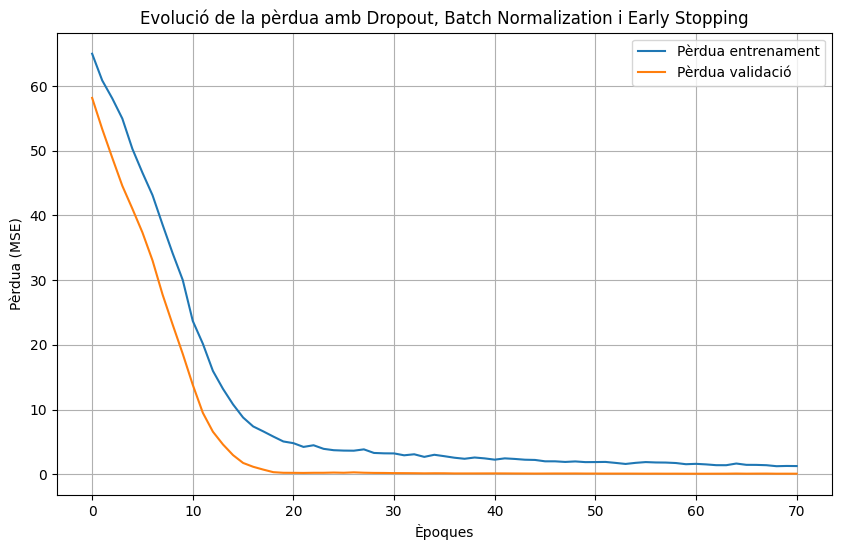

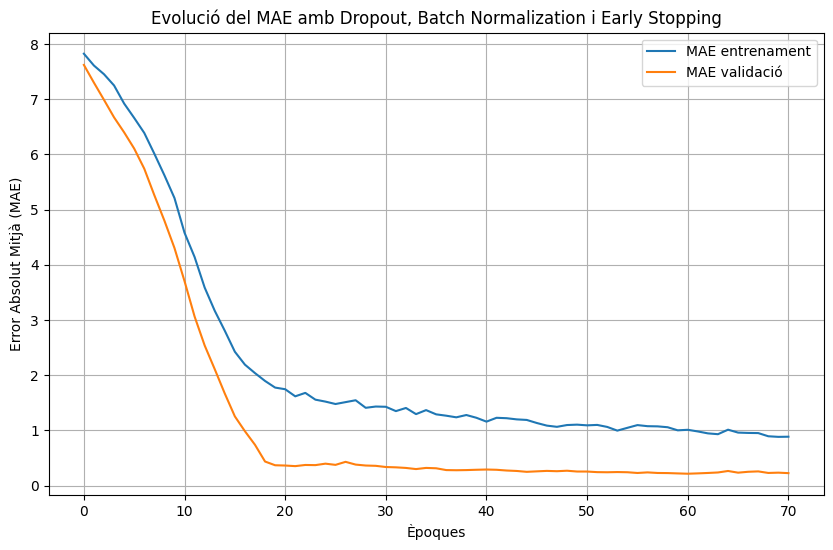

In [31]:
from tensorflow.keras.layers import Dropout
# Crear el model amb Batch Normalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Capa de sortida
])
# Crear el model amb Dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Afegir Batch Normalization després de la capa
    Dropout(0.3),  # Afegim Dropout amb un 30% de neurones desactivades
    Dense(128, activation='relu'),
    BatchNormalization(),  # Afegir Batch Normalization després de la capa
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Afegir Batch Normalization després de la capa
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),  # Afegir Batch Normalization després de la capa
    Dropout(0.3),
    Dense(1)  # Capa de sortida
])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitoritza la pèrdua de validació
                               patience=10,         # Nombre d'èpoques sense millora abans de parar
                               restore_best_weights=True)  # Restaurar els pesos del millor model

# Compilar el model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=200, 
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stopping])  # Afegim el callback Early Stopping

# Gràfic de la funció de pèrdua
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua (MSE)')
plt.title('Evolució de la pèrdua amb Dropout, Batch Normalization i Early Stopping')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de la mètrica
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE entrenament')
plt.plot(history.history['val_mae'], label='MAE validació')
plt.xlabel('Èpoques')
plt.ylabel('Error Absolut Mitjà (MAE)')
plt.title('Evolució del MAE amb Dropout, Batch Normalization i Early Stopping')
plt.legend()
plt.grid(True)
plt.show()

# Comentari
Els resultats obtesos amb el conjunt de validació són millors que amb el conjunt d'entrenament.

Explicació:

Tot i que la norma general és que l’error en entrenament tendeixi a ser més baix que en validació, no és estrany que passi just el contrari, especialment si hi ha mecanismes de regularització i la distribució del conjunt de validació és més “fàcil” o està menys contaminada que la d’entrenament. Algunes raons habituals són:

1. **Efecte del Dropout i d’altres tècniques de regularització**  
   Quan entrenem amb Dropout, el model “aprèn” amb algunes neurones desactivades de manera aleatòria; això augmenta l’error en entrenament perquè és més difícil ajustar-se perfectament als exemples. En canvi, en validació no s’aplica Dropout i el model pot aprofitar tota la seva capacitat, fet que pot reduir l’error.

2. **Distribucions de dades diferents o subconjunt de validació més “fàcil”**  
   De vegades, el conjunt de validació pot ser sistemàticament més senzill (o menys sorollós) que el d’entrenament. Si el model s’adapta millor a la distribució de validació i aquesta és més “previsible”, l’error pot resultar inferior al d’entrenament.

3. **Efecte de l’Early Stopping**  
   Quan utilitzes Early Stopping, el procés d’entrenament pot parar en el punt on el model rendeix millor en validació (abans de sobreentrenar-se). Això pot “afavorir” la puntuació en validació, mentre que en entrenament encara es podria haver baixat més l’error si s’hagués seguit entrenant (risc de sobreajustar).

4. **Diferències en la mida dels conjunts**  
   El conjunt d’entrenament sol ser més gran i pot tenir exemples més diversos o “difícils”. El conjunt de validació pot ser més petit i tenir menys casos extrems, de manera que el model pot obtenir-hi un error mitjà més baix.

En definitiva, no és cap senyal de problema veure MAE de validació lleugerament millor que el d’entrenament quan hi ha tècniques de regularització i/o diferències en les dades. Això simplement indica que el model, en el moment de la validació, està “desbloquejant” la seva capacitat de generalització sense les restriccions que té durant l’entrenament (com el Dropout), i que la distribució de validació pot ser més benigna.

## Pregunta 18

Acaba de sortir una serie que ens han dit que està molt be. Es tracta de _Severance_ <https://www.imdb.com/es-es/title/tt11280740/>. 

1. Què deuriem de fer per a fer una predicció a partir de les dades existents a la web?
2. Com ho implementaries per a fer-ho el més automatitzat possible?


1. Deuriem:
   1. fer un scrapping de IMDB en la serie concreta, i recuperar els valors de les variables _característica_ que són input del model que hem entrenat.
   2. Aquestes variables estaran en text pla i inclòs en valors no admesos com a entrada del nostre model, per la qual cosa, hem d'aplicar les mateixes tècniques de preprocessat que hem fet servir en el nostre dataset abans d'entrenar la XXNN
   3. Un cop les dades preparades, hauriem de fer el `predict()` i comprovar que el resutat és adequat
2. Per a fer-ho el més autmatitzat possible:
   1. Implementar funcions de, scrap(), preprocessat(), així com mètodes de guardat i càrrega del model i dels objectes de preprocessat.

## Pregunta 19
Observa els valors finals de l'entrenament de la xarxa neuronal. Quin hauria de ser (més o menys) l'error en fer un la predicció de l'apartat anterior?

El val_mae aconseguit en l'anterior xarxa neuronal era de 0.2358, així que l'error hauria de rondar este valor.

## Pregunta 20
Si agafarem la pel·lícula "The Game" de David Fincher creus que la predicció obtesa seria bona? I si ho ferem amb la pel·lícula "Gothika" de Mathieu Kassovitz? Justifica la resposta.

En la primera faria una bona predicció perquè està entrenat amb dades on el target pren el valor entre 7.6 i 9.3. En la segona no, perquè en eixe rang no té informació.

## Prediccions, fora d'examen
Esta pregunta no anirà a l'examen, ho farem com a pràctica.

In [32]:
# Exemple fictici de nova pel·lícula
pelicula_nova = pd.DataFrame({
    'Released_Year': [2022],
    'Genre': ['Thriller, Drama'], 
    'Meta_score': [63],
    'Director': ['David Fincher'],
    'Star1': ['Michael Douglas'],
    'Star2': ['Sean Penn'],
    'Star3': ['Deborah Kara Unger'],
    'Star4': ['James Rebhorn'],
    'Gross': [14337029]
})

# 1. Omplir nuls (si escau) amb la mateixa mitjana
pelicula_nova['Gross'].fillna(gross_mean, inplace=True)
pelicula_nova['Meta_score'].fillna(meta_score_mean, inplace=True)

# 2. Transformar la columna 'Genre' de la mateixa manera:
genre_split_new = pelicula_nova['Genre'].str.get_dummies(sep=',') 

# Alineem les columnes de genre_split_new amb les de genre_split
genre_split_new = genre_split_new.reindex(columns=genre_split.columns, fill_value=0)

# 3. One-Hot Encoding usant el MATEIX objecte `encoder` entrenat
categorical_cols = ['Director','Star1','Star2','Star3','Star4']
categorical_encoded_new = encoder.transform(pelicula_nova[categorical_cols])  # NO fem fit(), només transform()

# 4. Treure les columnes categòriques originals i afegir-ne les noves
pelicula_nova = pelicula_nova.drop(['Genre','Director','Star1','Star2','Star3','Star4'], axis=1)

# Combinar-ho tot
X_nova = np.hstack([
    pelicula_nova.values,       # ['Released_Year', 'Meta_score', 'Gross']
    genre_split_new.values,
    categorical_encoded_new
])

# 5. Normalitzar amb el MATEIX objecte scaler
#   Assegura’t de fer-ho en els mateixos índexs de columnes on tenies la part numèrica (p.ex. 0,1,2)
X_nova[:, [0, 1, 2]] = scaler.transform(X_nova[:, [0, 1, 2]])

# 6. Finalment, passa aquest vector al teu model per fer la predicció
y_pred = model.predict(X_nova)  # On 'model' és el model que has entrenat prèviament
print("Predicció IMDb Rating:", y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicció IMDb Rating: [[8.282729]]


/tmp/ipykernel_72872/4035889282.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pelicula_nova['Gross'].fillna(gross_mean, inplace=True)
/tmp/ipykernel_72872/4035889282.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [33]:
# Exemple fictici de nova pel·lícula
pelicula_nova = pd.DataFrame({
    'Released_Year': [2003],
    'Genre': ['Horror, Mistery, Thriller'], 
    'Meta_score': [38],
    'Director': ['Mathieu Kassovitz'],
    'Star1': ['Halle Berry'],
    'Star2': ['Robert Downey Jr.'],
    'Star3': ['Penélope Cruz'],
    'Star4': ['John Carroll Lynch'],
    'Gross': [19288438]
})

# 1. Omplir nuls (si escau) amb la mateixa mitjana
pelicula_nova['Gross'].fillna(gross_mean, inplace=True)
pelicula_nova['Meta_score'].fillna(meta_score_mean, inplace=True)

# 2. Transformar la columna 'Genre' de la mateixa manera:
genre_split_new = pelicula_nova['Genre'].str.get_dummies(sep=',') 

# Alineem les columnes de genre_split_new amb les de genre_split
genre_split_new = genre_split_new.reindex(columns=genre_split.columns, fill_value=0)

# 3. One-Hot Encoding usant el MATEIX objecte `encoder` entrenat
categorical_cols = ['Director','Star1','Star2','Star3','Star4']
categorical_encoded_new = encoder.transform(pelicula_nova[categorical_cols])  # NO fem fit(), només transform()

# 4. Treure les columnes categòriques originals i afegir-ne les noves
pelicula_nova = pelicula_nova.drop(['Genre','Director','Star1','Star2','Star3','Star4'], axis=1)

# Combinar-ho tot
X_nova = np.hstack([
    pelicula_nova.values,       # ['Released_Year', 'Meta_score', 'Gross']
    genre_split_new.values,
    categorical_encoded_new
])

# 5. Normalitzar amb el MATEIX objecte scaler
#   Assegura’t de fer-ho en els mateixos índexs de columnes on tenies la part numèrica (p.ex. 0,1,2)
X_nova[:, [0, 1, 2]] = scaler.transform(X_nova[:, [0, 1, 2]])

# 6. Finalment, passa aquest vector al teu model per fer la predicció
y_pred = model.predict(X_nova)  # On 'model' és el model que has entrenat prèviament
print("Predicció IMDb Rating:", y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicció IMDb Rating: [[7.8741097]]


/tmp/ipykernel_72872/983241286.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pelicula_nova['Gross'].fillna(gross_mean, inplace=True)
/tmp/ipykernel_72872/983241286.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru